In [1]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
plt.style.use('classic')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [2]:
def f(n,t):
    return n*np.cos(n*20*np.pi*t)
    

In [3]:
t = np.arange(0,0.5,0.0005)
f0 = f(0,t)
f1 = f(1,t)
f2 = f(2,t)
f3 = f(3,t)
f4 = f(4,t)
f5 = f(5,t)
g = f0+f1+f2+f3+f4+f5

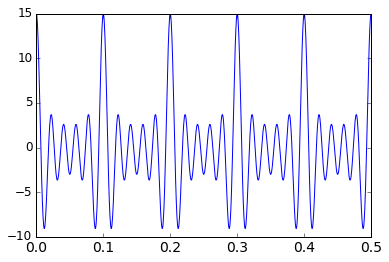

In [4]:
plt.figure()
plt.plot(t,g)
plt.show()

In [5]:
N = 1000
dt = 0.005
T = dt*N
df = 1/T
dw = 2*np.pi/T

In [6]:
g=np.asarray(g)
fou = np.fft.fft(g)
#fou = np.fft.fftshift(fou)
freq = np.fft.fftfreq(t.shape[-1])

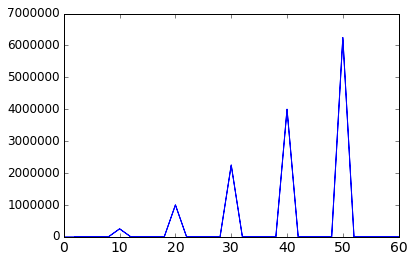

In [7]:
plt.plot(abs(10*freq*N*df),abs(fou)**2)
plt.xlim(0,60)
plt.show()

In [2]:
pot = np.load("C:\\Users\\giannis\\Desktop\\Python_scrpts\\ti255\\pot_all_midplane.npy")
pot[np.isnan(pot)] = 0
pot_tor = pot.mean(axis = 2)
pot_tt = pot_tor.mean(axis = 0)
dpot = np.ones((pot.shape[0],pot.shape[1],pot.shape[2],pot.shape[3]))
for time in range(0,pot.shape[0]):
    for plane in range(0,pot.shape[2]):
        dpot[time,:,plane,:] = pot[time,:,plane,:] - pot_tt[:,:]
dpot.shape

(200, 100, 32, 100)

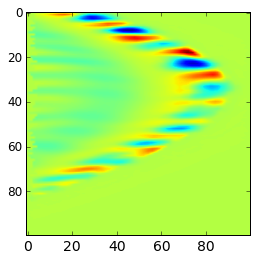

In [3]:
plt.imshow(dpot[180,:,9,0:100])
plt.show()

In [4]:
dR = (2.26-2.15)/100
dZ = (0.55+0.28)/100
R = [2.15+ip*dR for ip in range(100)]
Z = [-0.28+ip*dZ for ip in range(100)]
R[99]
Z[99]

0.5417

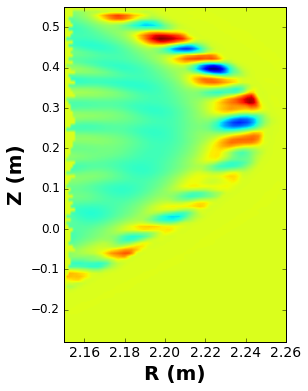

In [5]:
dR = (2.26-2.15)/100
dZ = (0.55+0.28)/100
R = [2.15+ip*dR for ip in range(100)]
Z = [-0.28+ip*dZ for ip in range(100)]
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(dpot[190,:,9,0:100],extent=[2.15,2.26,-0.28,0.55])
ax.set_aspect(0.2)
#plt.ylim(0.25,0.35)
#plt.xlim(2.22,2.25)
plt.xlabel("R (m)")
plt.ylabel("Z (m)")
plt.show()

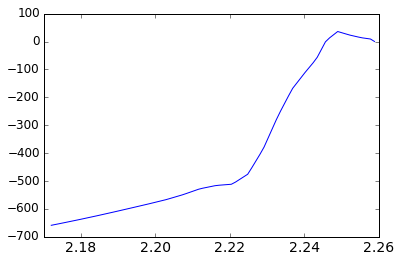

In [11]:
plt.plot(R[20:],pot_tt[38,20:])
plt.show()

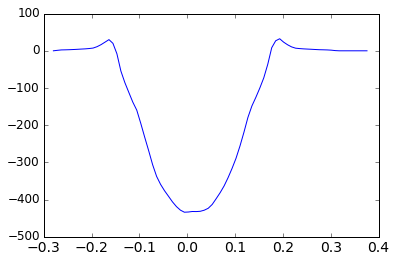

In [12]:
plt.plot(Z[0:80],pot_tt[0:80,70])
plt.show()

In [13]:
N_z = len(Z[0:80])
dt_z = dZ
T_z = dt_z*N_z
df_z = 1/T_z
dw_z = 2*np.pi/T_z
freq_z = np.fft.fftfreq(len(Z[0:80]))

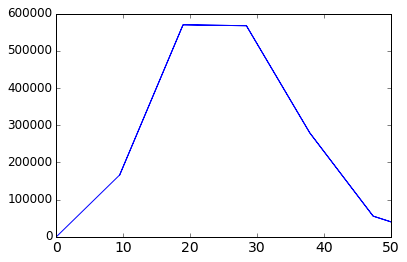

In [14]:
fou_z = np.fft.fft(pot_tt[0:80,85]-np.mean(pot_tt[0:80,85]))
plt.plot(abs(freq_z*N_z*dw_z),abs(fou_z)**2)
plt.xlim(0,50)
plt.show()

In [15]:
N_r = len(R[10:])
dt_r = dR
T_r = dt_r*N_r
df_r = 1/T_r
dw_r = 2*np.pi/T_r
freq_r = np.fft.fftfreq(len(R[10:]))

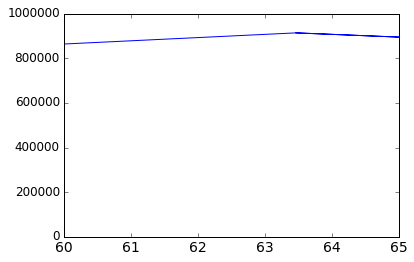

In [16]:
t_f_r = []
for time in range(pot.shape[0]):
    for plane in range(pot.shape[2]):
        t_f_r.append(abs(np.fft.fft(dpot[time,40,plane,10:]-np.mean(dpot[time,40,plane,10:])))**2)
tfr = np.asarray(t_f_r)
tfr = np.reshape(tfr,(200,32,90))
tfr_tor = tfr.mean(axis=1)
tfr_avg = tfr_tor.mean(axis=0)
plt.plot(abs(freq_r*N_r*dw_r),tfr_avg)
plt.xlim(60,65)
plt.show()

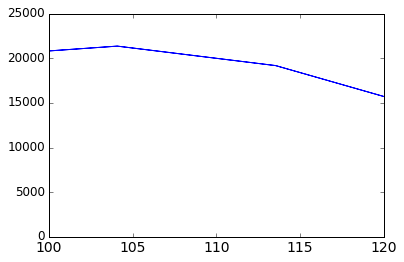

In [17]:
t_f_z = []
for time in range(pot.shape[0]):
    for plane in range(pot.shape[2]):
        t_f_z.append(abs(np.fft.fft(dpot[time,0:80,plane,85]-np.mean(dpot[time,0:80,plane,85]))**2))
tfz = np.asarray(t_f_z)
tfz = np.reshape(tfz,(200,32,80))
tfz_tor = tfz.mean(axis=1)
tfz_avg = tfz_tor.mean(axis=0)
plt.plot(abs(freq_z*N_z*dw_z),tfz_avg)
plt.xlim(100,120)
plt.show()

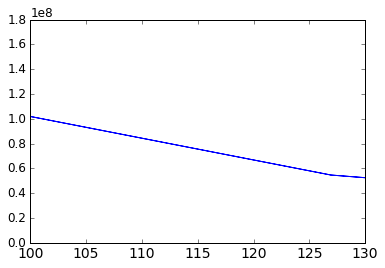

In [18]:
fou_r = np.fft.fft(pot_tt[42,10:]-np.mean(pot_tt[42,10:]))
#fou_r = []
#for i in range(35,45):
    #fou_r.append(np.fft.fft(pot_tt[i,10:]))
#fou_r = np.asarray(fou_r)
#fou_r = fou_r.mean(axis=0)
#fou_r = np.fft.fftshift(fou_r)
plt.plot(abs(freq_r*N_r*dw_r),abs(fou_r)**2)
plt.xlim(100,130)
plt.show()

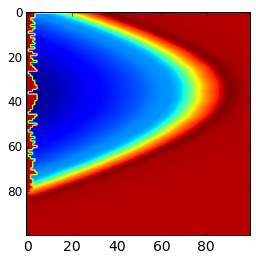

In [19]:
plt.imshow(pot_tt)
plt.show()

In [20]:
first1 = np.mean(dpot[180,:,0,:],axis=0)
sec2 = np.mean(first1)
F3 = np.fft.fft2(dpot[180,:,0,:]-sec)/(100*100)
F3 = np.fft.fftshift(F3)
P3 = abs(F3)**2

NameError: name 'sec' is not defined

NameError: name 'P3' is not defined

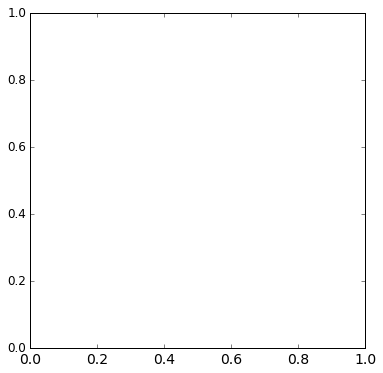

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(P3)
plt.xlim(45,55)
plt.ylim(45,55)
#ax.colorbar()
ax.set_aspect(0.6)
plt.show()

In [18]:
first = np.mean(pot_tt[:,:],axis=0)
sec = np.mean(first)
F2 = np.fft.fft2(pot_tt[:,:]-sec)/(100*100)
F2 = np.fft.fftshift(F2)
P2 = abs(F2)**2

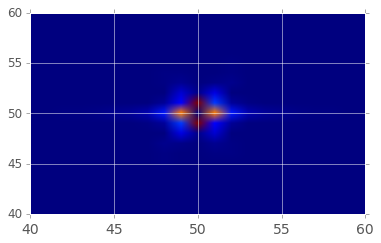

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(P2)
plt.xlim(40,60)
plt.ylim(40,60)
#ax.colorbar()
ax.set_aspect(0.6)
plt.show()

In [240]:
k_perp = np.sqrt(60**2 + 9**2)
rho_i = 1.9e-3
arg = (k_perp**2)*(rho_i**2)
arg2 = k_perp*rho_i
print(arg,arg2)

0.01328841 0.115275365972


In [234]:
scipy.special.jv(0,arg)

0.99995585502712092

In [241]:
scipy.special.jn(0,arg2)

0.99668065557302399

In [242]:
scipy.special.ive(0,arg)

0.98684305433227237

In [24]:
k_perpt = np.sqrt(64**2 + 105**2)
rho_i = 1.9e-3
argt = (k_perpt**2)*(rho_i**2)
#arg2 = k_perp*rho_i
print(k_perpt)

122.967475375


In [26]:
scipy.special.ive(0,argt)

0.94758179485501814